In [234]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [235]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  accuracy_score
from sklearn.linear_model import LogisticRegression

In [236]:
inp0 = pd.read_csv("spam_ham_dataset.csv")

In [237]:
inp0

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [238]:
inp0.drop(columns="Unnamed: 0", inplace=True)
inp0.drop(columns="label_num" , inplace=True)

In [239]:
inp0.shape

(5171, 2)

In [240]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [241]:
inp0.describe()

,label,text
count,5171,5171
unique,2,4993
top,ham,Subject: calpine daily gas nomination\r\n>\r\n...
freq,3672,20


In [242]:
inp0.isnull().sum()

label    0
text     0
dtype: int64

In [266]:
inp0.loc[inp0["label"] == "spam" ,"label,"] = 1
inp0.loc[inp0["label"] == "ham" ,"label,"] = 0

<Axes: xlabel='label', ylabel='count'>

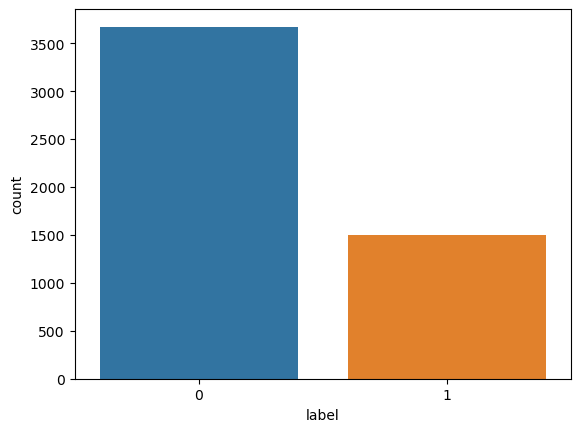

In [267]:
sns.countplot(data=inp0,x="label")

In [244]:
X = inp0["text"]
Y = inp0["label"]

In [245]:
print(X)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object


In [246]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label, Length: 5171, dtype: object


In [247]:
X_train, X_test , Y_train ,Y_test = train_test_split(X ,Y, test_size= 0.2 , random_state=3)

In [248]:
vectorizer =  TfidfVectorizer(lowercase=True)

In [249]:
feature_extraction  =  TfidfVectorizer(min_df=1 , stop_words="english" , lowercase=True)
X_train_features =  feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")



In [250]:
print(X_train)

2209    Subject: hplc to wellhead\r\ndaren here is the...
2000    Subject: mobil chemical - hpl meter # 1256 - e...
5030    Subject: revised nom 5 / 5 - eastrans ; revise...
1376    Subject: re : exxon company , usa global # 960...
1564    Subject: your pharmacy nx\r\nwant a cheap pain...
                              ...                        
789     Subject: incr ' ease yo ' ur man ' hood by 4 -...
968     Subject: subscribers receive first notice on r...
1667    Subject: neon for march 28\r\nhere is the neon...
3321    Subject: re : first delivery - pure resources ...
1688    Subject: enhance your chest size\r\nemail is l...
Name: text, Length: 4136, dtype: object


In [251]:
print(X_train_features)


  (0, 3871)	0.13387711316973605
  (0, 531)	0.14556222812251965
  (0, 30451)	0.08468916670398006
  (0, 43273)	0.14556222812251965
  (0, 3890)	0.14556222812251965
  (0, 548)	0.14556222812251965
  (0, 37262)	0.11275796314501375
  (0, 2908)	0.11535664415295803
  (0, 456)	0.14556222812251965
  (0, 26297)	0.09506000151609588
  (0, 36190)	0.11400727959297849
  (0, 2478)	0.13872687405852518
  (0, 521)	0.14556222812251965
  (0, 16808)	0.11843023142166303
  (0, 22041)	0.13387711316973605
  (0, 2706)	0.14556222812251965
  (0, 522)	0.14556222812251965
  (0, 32060)	0.07311834410351342
  (0, 19411)	0.04211028825505044
  (0, 2537)	0.13872687405852518
  (0, 517)	0.14556222812251965
  (0, 19429)	0.14556222812251965
  (0, 16637)	0.24438399643390496
  (0, 3875)	0.14556222812251965
  (0, 836)	0.14556222812251965
  :	:
  (4135, 8873)	0.07154271542163933
  (4135, 16161)	0.07327358549803296
  (4135, 26936)	0.07154271542163933
  (4135, 15691)	0.07812310961344454
  (4135, 14167)	0.07812310961344454
  (4135, 11

In [252]:
model = LogisticRegression()

In [253]:
model.fit(X_train_features ,Y_train)

LogisticRegression()

In [254]:
prediction_train_data = model.predict(X_train_features)
accuracy_train_data = accuracy_score(Y_train, prediction_train_data)

In [255]:
print("Accuracy of train data:", accuracy_train_data)

Accuracy of train data: 0.9970986460348162


In [258]:
prediction_test_data = model.predict(X_test_features)
accuracy_test_data = accuracy_score(Y_test, prediction_test_data)

In [260]:
print("Accuracy of test data:", accuracy_test_data)

Accuracy of test data: 0.9806763285024155


In [262]:
input_mail =['Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n']
input_data_feautures = feature_extraction.transform(input_mail)


prediction = model.predict(input_data_feautures)

print(prediction)

if(prediction[0]==1):
    print("spam mail")
    
else:
    print("ham mail")

[1]
spam mail


# THANK YOU